In [3]:
import os
import glob

import fiftyone as fo

from tator_tools.download_media import MediaDownloader
from tator_tools.fiftyone_clustering import FiftyOneDatasetViewer
from tator_tools.download_datasets import DatasetDownloader
from tator_tools.yolo_dataset import YOLODataset
from tator_tools.train_model import ModelTrainer
from tator_tools.inference_video import VideoInferencer

from yolo_tiler import YoloTiler, TileConfig

# Download Media (video -> frames) from Tator

In [2]:
# Initialize the downloader with the required parameters
downloader = MediaDownloader(
    api_token=os.getenv("TATOR_TOKEN"),
    project_id=155,
    output_dir="../Data"
)

# Download the media
media_ids = ["14759824"]

NOTE: Authentication successful for jordan.pierce


In [ ]:
downloader.download_data(media_ids,             # Download these videos
                         convert=False,         # Convert the videos to MP4
                         extract=True,          # Extract frames from the videos
                         every_n_seconds=3)     # Extract 1 frame every 3 seconds

In [ ]:
downloader.data

# View Clustered Frames from Tator using Fiftyone

In [ ]:
# Initialize the viewer with the path to the directory containing images
viewer = FiftyOneDatasetViewer(image_dir=downloader.image_dir)

# Process the dataset to create the FiftyOne dataset and generate the UMAP visualization
viewer.process_dataset()

In [ ]:
# Launch the FiftyOne app
try:
    session = fo.launch_app(viewer.dataset)
except:
    # Weird behavior in notebook
    session = fo.launch_app(viewer.dataset)

# Download Datasets from Tator

In [4]:
# Set parameters
api_token = os.getenv("TATOR_TOKEN")
project_id = 70  # 155

# Search string comes from Tator's Data Metadata Export utility
search_string = "eyJtZXRob2QiOiJBTkQiLCJvcGVyYXRpb25zIjpbeyJhdHRyaWJ1dGUiOiJTY2llbnRpZmljTmFtZSIsIm9wZXJhdGlvbiI6ImlzbnVsbCIsImludmVyc2UiOnRydWUsInZhbHVlIjp0cnVlfSx7ImF0dHJpYnV0ZSI6IkluZGl2aWR1YWxDb3VudCIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjoiMSJ9LHsiYXR0cmlidXRlIjoiJHZlcnNpb24iLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NDk5fSx7Im1ldGhvZCI6Ik9SIiwib3BlcmF0aW9ucyI6W3siYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NTU0fSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjE1Mn0seyJhdHRyaWJ1dGUiOiIkdHlwZSIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjo0NDh9LHsiYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NDYxfSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjUxMX0seyJhdHRyaWJ1dGUiOiIkdHlwZSIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjo1MTZ9LHsiYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NTU3fSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjE0N30seyJhdHRyaWJ1dGUiOiIkdHlwZSIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjozMTV9LHsiYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NDkzfSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjE0NH0seyJhdHRyaWJ1dGUiOiIkdHlwZSIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjo1MDB9LHsiYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6MjU2fSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjI1OH0seyJhdHRyaWJ1dGUiOiIkdHlwZSIsIm9wZXJhdGlvbiI6ImVxIiwiaW52ZXJzZSI6ZmFsc2UsInZhbHVlIjoxNzJ9LHsiYXR0cmlidXRlIjoiJHR5cGUiLCJvcGVyYXRpb24iOiJlcSIsImludmVyc2UiOmZhbHNlLCJ2YWx1ZSI6NDQwfSx7ImF0dHJpYnV0ZSI6IiR0eXBlIiwib3BlcmF0aW9uIjoiZXEiLCJpbnZlcnNlIjpmYWxzZSwidmFsdWUiOjI0N31dfV19"

# Demo for downloading labeled data
frac = 1.0

dataset_name = "MR_Downward_Facing_Imagery"
output_dir = "../Data/Labeled_Data"

label_field = "ScientificName"

In [5]:
# Create a downloader for the labeled data
downloader = DatasetDownloader(api_token,
                               project_id=project_id,
                               search_string=search_string,
                               frac=frac,
                               output_dir=output_dir,
                               dataset_name=dataset_name,
                               label_field=label_field)

NOTE: Authentication successful for jordan.pierce
NOTE: Search string saved to e:\tator-tools\Data\Labeled_Data\MR_Downward_Facing_Imagery\search_string.txt


In [6]:
# Download the labeled data
downloader.download_data()

NOTE: Querying Tator for labeled data
NOTE: Found 23670 objects in query


Processing query: 100%|██████████| 23670/23670 [00:02<00:00, 10123.07it/s]


NOTE: Found 23670 query objects after sampling
NOTE: Data saved to e:\tator-tools\Data\Labeled_Data\MR_Downward_Facing_Imagery\data.csv
NOTE: Data saved to e:\tator-tools\Data\Labeled_Data\MR_Downward_Facing_Imagery\data.json
NOTE: Downloading images to e:\tator-tools\Data\Labeled_Data\MR_Downward_Facing_Imagery\images


NOTE: Images downloaded to e:\tator-tools\Data\Labeled_Data\MR_Downward_Facing_Imagery\images


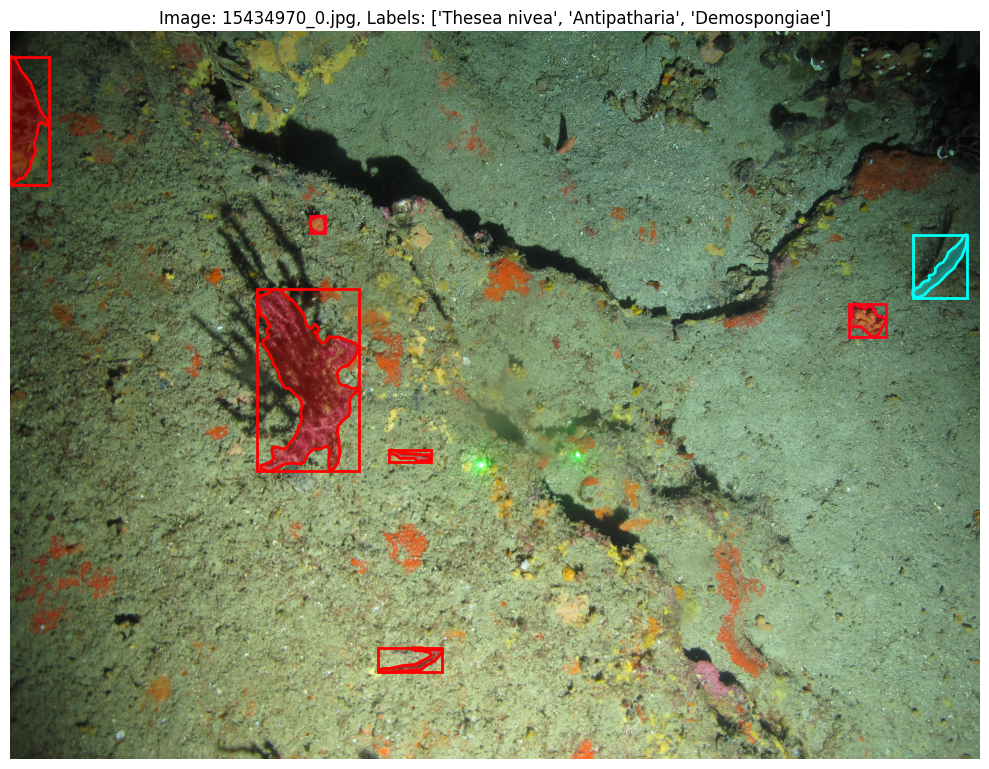

In [7]:
downloader.display_sample()

In [8]:
df = downloader.as_dataframe()  # .as_dict()

# Do some data exploration, filtering as needed
# Example: Drop all rows where x, y, width, or height is NaN
df = df.dropna(subset=["x", "y", "width", "height"])

df.head(3)

,media,frame,image_name,image_path,x,y,width,height,polygon,label
0,12328625,0,12328625_0.jpg,e:\tator-tools\Data\Labeled_Data\MR_Downward_F...,0.326900,0.033762,0.418714,0.263753,[],Bryozoa
1,12328625,0,12328625_0.jpg,e:\tator-tools\Data\Labeled_Data\MR_Downward_F...,0.442702,0.331190,0.248636,0.304044,[],Bryozoa
2,12328625,0,12328625_0.jpg,e:\tator-tools\Data\Labeled_Data\MR_Downward_F...,0.291918,0.615756,0.168882,0.356832,[],Bryozoa


# Convert Data into YOLO-formatted Dataset

In [9]:
# Set parameters
output_dir = "../Data/Labeled_Data/MR_Downward_Facing_Imagery"
dataset_name = "YOLODataset_Detection"

train_ratio = 0.8
test_ratio = 0.1

task = 'detect' # 'detect' or 'segment'

In [10]:
# Create and process dataset
dataset = YOLODataset(
    data=df,
    output_dir=output_dir,
    dataset_name=dataset_name,
    train_ratio=train_ratio,
    test_ratio=test_ratio,
    task=task
)

In [ ]:
# Process the dataset
dataset.process_dataset(move_images=False)  # Makes a copy of the images instead of moving them

In [12]:
dataset.dataset_dir

'e:\\tator-tools\\Data\\Labeled_Data\\MR_Downward_Facing_Imagery\\YOLODataset_Detection'

# Tile Dataset (Optional)

In [19]:
src = dataset.dataset_dir               # Source YOLO dataset directory
dst = f"{dataset.dataset_dir}_Tiled"    # Output directory for tiled dataset

config = TileConfig(
    # Size of each tile (width, height). Can be:
    # - Single integer for square tiles: slice_wh=640
    # - Tuple for rectangular tiles: slice_wh=(640, 480)
    slice_wh=(1920, 1080),

    # Overlap between adjacent tiles. Can be:
    # - Single float (0-1) for uniform overlap percentage: overlap_wh=0.1
    # - Tuple of floats for different overlap in each dimension: overlap_wh=(0.1, 0.1)
    # - Single integer for pixel overlap: overlap_wh=64
    # - Tuple of integers for different pixel overlaps: overlap_wh=(64, 48)
    overlap_wh=(0.2, 0.2),

    # Input image file extension to process
    input_ext=".jpg",

    # Output image file extension to save (default: same as input_ext)
    output_ext=None,

    # Type of YOLO annotations to process:
    # - "object_detection": Standard YOLO format (class, x, y, width, height)
    # - "instance_segmentation": YOLO segmentation format (class, x1, y1, x2, y2, ...)
    annotation_type="object_detection",

    # Include negative samples (tiles without any instances)
    include_negative_samples=True
)

tiler = YoloTiler(
    source=src,
    target=dst,
    config=config,
    num_viz_samples=15,                     # Number of samples to visualize
    show_processing_status=True,            # Show the progress of the tiling process
)

In [ ]:
tiler.run()

# Train a YOLO Model

In [15]:
dir_ = "E:\\tator-tools\\Data\\Labeled_Data\\MR_Downward_Facing_Imagery\\YOLODataset_Detection"

# Initialize the trainer with the required parameters
trainer = ModelTrainer(
    training_data=f"{dir_}\\data.yaml",
    weights="yolov8m.pt",
    output_dir=f"{dir_}\\Training",
    name="yolov8m",
    task='detect',
    epochs=50,
    half=True,
    imgsz=640,
    single_cls=False,
    plots=True,
    batch=0.5,
)

In [ ]:
# Train the model
trainer.train_model()

In [ ]:
# Evaluate on the model (if test data is available)
trainer.evaluate_model()

# Inference on Video

In [19]:
# Set parameters
model_weights = "E:\\tator-tools\\Data\\Labeled_Data\\AUV_Polygons\\YOLODataset_Detection_Tiled\\Training\\AUV_Polygons_Detection\\weights\\best.pt"

video_path = "E:\\tator-tools\\Data\\Raw_Videos\\GL2301_VID_20230725T145731Z_D015_DROPCAM_HIGH_converted.mp4"
output_dir = "E:\\tator-tools\\Data\\Inference_Results"


In [ ]:
inferencer = VideoInferencer(
    weights_path=model_weights,
    model_type='yolo',
    video_path=video_path,
    output_dir=output_dir,
    start_at=1000,
    end_at=2000,
    conf=0.5,
    iou=0.3,
    track=False,
    segment=False,
    sahi=False,
    show=True
)

In [ ]:
inferencer.inference()